In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,make_scorer
import shap
import os
import pickle
import warnings
warnings.filterwarnings('ignore')
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

In [89]:
#import training and testing data
train = pd.read_csv(r"C:\Ziyuan Sui\Data Science Extra\My Own Project\All NBA Team Prediction\2024\train2024.csv")
test = pd.read_csv(r"C:\Ziyuan Sui\Data Science Extra\My Own Project\All NBA Team Prediction\2024\test2024_final.csv")

In [90]:
top_mp = test['MP'].quantile(0.85)
test2 = test[test.G>=65] #NBA introduced this 65 game rule starting this season
test2 = test2[test2['MP'] >=20]

In [91]:
#fill null value
train=train.fillna(0)
test2=test2.fillna(0)
encoded_train = pd.get_dummies(train, columns=['Pos'])
encoded_test = pd.get_dummies(test2,columns=['Pos'])

In [92]:
real_test = encoded_test.drop(columns=['Player','G','MP'])

In [93]:
X = encoded_train.drop(columns=['# Tm','Player','Share','SeasonID','Team','Tm','season','year','Age','G','MP'])
y = encoded_train.Share

In [94]:
X.columns

Index(['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'WinPCT', 'Pos_C', 'Pos_F', 'Pos_G'],
      dtype='object')

In [95]:
real_test.columns

Index(['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'WinPCT', 'Pos_C', 'Pos_F', 'Pos_G'],
      dtype='object')

In [96]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Random Forest

In [102]:
# create a random forest model
model = RandomForestRegressor(n_estimators=250,max_depth=5)

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model using RMSE, R-squared, and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('MAE:', mae)

RMSE: 0.16172111699226557
R-squared: 0.7396590416377293
MAE: 0.11590051275917186


In [103]:
result = model.predict(real_test)
output = encoded_test
output['prediction']=result
output = output.sort_values('prediction',ascending=False)

In [104]:
first = output[0:5]
second = output[5:10]
third = output[10:15]

In [105]:
first

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
461,Shai Gilgeous-Alexander,75,34.0,30.1,5.5,6.2,2.0,0.9,0.535,0.353,...,4.2,6.7,2.3,9.0,7.1,0.695,0,0,1,0.921858
210,Giannis Antetokounmpo,73,35.2,30.4,11.5,6.5,1.2,1.1,0.611,0.274,...,3.7,6.7,2.4,9.0,7.2,0.598,0,1,0,0.905951
573,Luka Dončić,70,37.5,33.9,9.2,9.8,1.4,0.5,0.487,0.382,...,3.5,8.3,1.7,9.9,8.0,0.610,0,0,1,0.901986
521,Nikola Jokić,79,34.6,26.4,12.4,9.0,1.4,0.9,0.583,0.359,...,5.1,9.0,4.2,13.2,10.6,0.695,1,0,0,0.881018
409,Domantas Sabonis,82,35.7,19.4,13.7,8.2,0.9,0.6,0.594,0.379,...,4.0,4.0,2.4,6.5,6.2,0.561,1,0,0,0.517533


In [106]:
second

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
36,Jalen Brunson,77,35.4,28.7,3.6,6.7,0.9,0.2,0.479,0.401,...,2.4,6.3,-0.4,5.8,5.4,0.610,0,0,1,0.490845
602,LeBron James,71,35.3,25.7,7.3,8.3,1.3,0.5,0.540,0.410,...,2.8,5.5,0.9,6.5,5.4,0.573,0,1,0,0.467415
594,Anthony Davis,76,35.5,24.7,12.6,3.5,1.2,2.3,0.556,0.271,...,4.7,3.5,1.7,5.1,4.9,0.573,1,0,0,0.394320
369,Jayson Tatum,74,35.7,26.9,8.1,4.9,1.0,0.6,0.471,0.376,...,4.1,4.5,0.6,5.1,4.7,0.780,0,1,0,0.387400
550,Tyrese Haliburton,69,32.2,20.1,3.9,10.9,1.2,0.7,0.477,0.364,...,1.5,7.3,-0.4,6.9,5.0,0.573,0,0,1,0.352976


In [107]:
third

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
156,Kevin Durant,75,37.2,27.1,6.6,5.0,0.9,1.2,0.523,0.413,...,3.2,4.0,0.1,4.0,4.3,0.598,0,1,0,0.337048
391,Victor Wembanyama,71,29.7,21.4,10.6,3.9,1.2,3.6,0.465,0.325,...,4.4,1.9,3.3,5.2,3.8,0.268,1,0,0,0.330467
443,Kawhi Leonard,68,34.3,23.7,6.1,3.6,1.6,0.9,0.525,0.417,...,2.9,4.8,0.6,5.5,4.4,0.622,0,1,0,0.273815
155,Devin Booker,68,36.0,27.1,4.5,6.9,0.9,0.4,0.492,0.364,...,2.0,4.0,-1.0,3.0,3.1,0.598,0,0,1,0.237818
208,Zion Williamson,70,31.5,22.9,5.8,5.0,1.1,0.7,0.570,0.333,...,2.8,3.3,0.6,3.8,3.3,0.598,0,1,0,0.236683


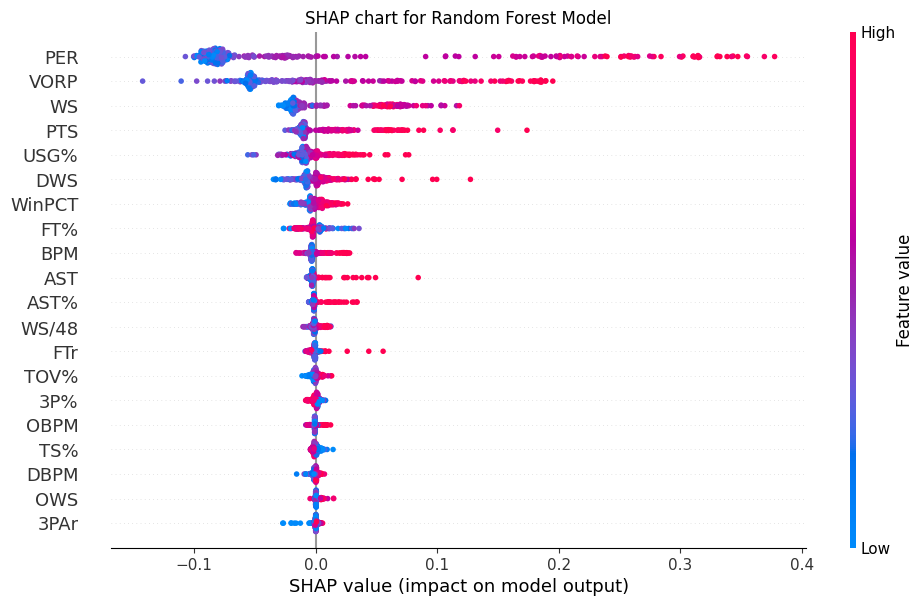

In [108]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(10,6),show=False)
plt.title('SHAP chart for Random Forest Model')
plt.show()

# XGBoost

In [109]:
# create an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=350)

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model using RMSE, R-squared, and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('MAE:', mae)

RMSE: 0.1642708457843212
R-squared: 0.7313851483447785
MAE: 0.10307573846349198


In [110]:
result2 = model.predict(real_test)
output2 = encoded_test
output2['prediction']=result2
output2 = output2.sort_values('prediction',ascending=False)
first2 = output2[0:5]
second2 = output2[5:10]
third2 = output2[10:15]

In [111]:
first2

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
210,Giannis Antetokounmpo,73,35.2,30.4,11.5,6.5,1.2,1.1,0.611,0.274,...,3.7,6.7,2.4,9.0,7.2,0.598,0,1,0,0.982332
521,Nikola Jokić,79,34.6,26.4,12.4,9.0,1.4,0.9,0.583,0.359,...,5.1,9.0,4.2,13.2,10.6,0.695,1,0,0,0.922696
573,Luka Dončić,70,37.5,33.9,9.2,9.8,1.4,0.5,0.487,0.382,...,3.5,8.3,1.7,9.9,8.0,0.610,0,0,1,0.920349
461,Shai Gilgeous-Alexander,75,34.0,30.1,5.5,6.2,2.0,0.9,0.535,0.353,...,4.2,6.7,2.3,9.0,7.1,0.695,0,0,1,0.909629
36,Jalen Brunson,77,35.4,28.7,3.6,6.7,0.9,0.2,0.479,0.401,...,2.4,6.3,-0.4,5.8,5.4,0.610,0,0,1,0.606279


In [112]:
second2

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
369,Jayson Tatum,74,35.7,26.9,8.1,4.9,1.0,0.6,0.471,0.376,...,4.1,4.5,0.6,5.1,4.7,0.780,0,1,0,0.506088
602,LeBron James,71,35.3,25.7,7.3,8.3,1.3,0.5,0.540,0.410,...,2.8,5.5,0.9,6.5,5.4,0.573,0,1,0,0.484227
594,Anthony Davis,76,35.5,24.7,12.6,3.5,1.2,2.3,0.556,0.271,...,4.7,3.5,1.7,5.1,4.9,0.573,1,0,0,0.431584
156,Kevin Durant,75,37.2,27.1,6.6,5.0,0.9,1.2,0.523,0.413,...,3.2,4.0,0.1,4.0,4.3,0.598,0,1,0,0.428877
409,Domantas Sabonis,82,35.7,19.4,13.7,8.2,0.9,0.6,0.594,0.379,...,4.0,4.0,2.4,6.5,6.2,0.561,1,0,0,0.396347


In [114]:
third2

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
500,DeMar DeRozan,79,37.8,24.0,4.3,5.3,1.1,0.6,0.480,0.333,...,2.2,2.1,-0.3,1.8,2.8,0.476,0,1,0,0.380265
391,Victor Wembanyama,71,29.7,21.4,10.6,3.9,1.2,3.6,0.465,0.325,...,4.4,1.9,3.3,5.2,3.8,0.268,1,0,0,0.318211
550,Tyrese Haliburton,69,32.2,20.1,3.9,10.9,1.2,0.7,0.477,0.364,...,1.5,7.3,-0.4,6.9,5.0,0.573,0,0,1,0.289745
613,Stephen Curry,74,32.7,26.4,4.5,5.1,0.7,0.4,0.450,0.408,...,2.0,6.3,-1.1,5.2,4.4,0.561,0,0,1,0.254955
208,Zion Williamson,70,31.5,22.9,5.8,5.0,1.1,0.7,0.570,0.333,...,2.8,3.3,0.6,3.8,3.3,0.598,0,1,0,0.252232


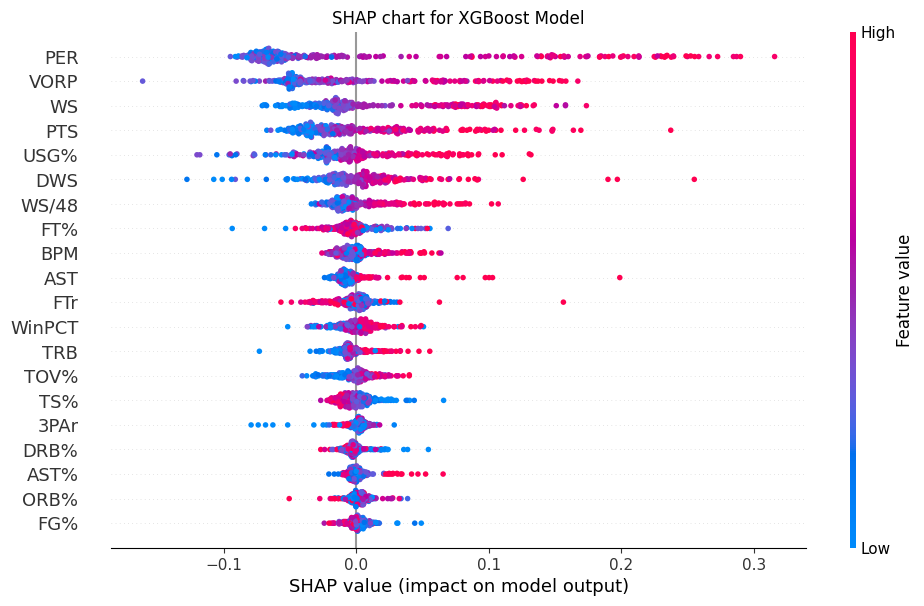

In [115]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(10,6),show=False)
plt.title('SHAP chart for XGBoost Model')
plt.show()

# CatBoost

In [116]:
# create a CatBoost model
model = CatBoostRegressor(iterations=250, loss_function='RMSE')

# train the model
model.fit(X_train, y_train, verbose=False)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model using RMSE, R-squared, and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('MAE:', mae)

RMSE: 0.1468964529032746
R-squared: 0.7852012979690131
MAE: 0.09894879891568552


In [117]:
result3 = model.predict(real_test)
output3 = encoded_test
output3['prediction']=result3
output3 = output3.sort_values('prediction',ascending=False)
first3 = output3[0:5]
second3= output3[5:10]
third3 = output3[10:15]

In [149]:
output3.head(30)

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
461,Shai Gilgeous-Alexander,75,34.0,30.1,5.5,6.2,2.0,0.9,0.535,0.353,...,4.2,6.7,2.3,9.0,7.1,0.695,0,0,1,1.046328
210,Giannis Antetokounmpo,73,35.2,30.4,11.5,6.5,1.2,1.1,0.611,0.274,...,3.7,6.7,2.4,9.0,7.2,0.598,0,1,0,1.010283
573,Luka Dončić,70,37.5,33.9,9.2,9.8,1.4,0.5,0.487,0.382,...,3.5,8.3,1.7,9.9,8.0,0.610,0,0,1,0.955108
521,Nikola Jokić,79,34.6,26.4,12.4,9.0,1.4,0.9,0.583,0.359,...,5.1,9.0,4.2,13.2,10.6,0.695,1,0,0,0.951525
36,Jalen Brunson,77,35.4,28.7,3.6,6.7,0.9,0.2,0.479,0.401,...,2.4,6.3,-0.4,5.8,5.4,0.610,0,0,1,0.589508
594,Anthony Davis,76,35.5,24.7,12.6,3.5,1.2,2.3,0.556,0.271,...,4.7,3.5,1.7,5.1,4.9,0.573,1,0,0,0.560330
550,Tyrese Haliburton,69,32.2,20.1,3.9,10.9,1.2,0.7,0.477,0.364,...,1.5,7.3,-0.4,6.9,5.0,0.573,0,0,1,0.540411
602,LeBron James,71,35.3,25.7,7.3,8.3,1.3,0.5,0.540,0.410,...,2.8,5.5,0.9,6.5,5.4,0.573,0,1,0,0.450825
369,Jayson Tatum,74,35.7,26.9,8.1,4.9,1.0,0.6,0.471,0.376,...,4.1,4.5,0.6,5.1,4.7,0.780,0,1,0,0.416478
409,Domantas Sabonis,82,35.7,19.4,13.7,8.2,0.9,0.6,0.594,0.379,...,4.0,4.0,2.4,6.5,6.2,0.561,1,0,0,0.395435


In [118]:
first3

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
461,Shai Gilgeous-Alexander,75,34.0,30.1,5.5,6.2,2.0,0.9,0.535,0.353,...,4.2,6.7,2.3,9.0,7.1,0.695,0,0,1,1.046328
210,Giannis Antetokounmpo,73,35.2,30.4,11.5,6.5,1.2,1.1,0.611,0.274,...,3.7,6.7,2.4,9.0,7.2,0.598,0,1,0,1.010283
573,Luka Dončić,70,37.5,33.9,9.2,9.8,1.4,0.5,0.487,0.382,...,3.5,8.3,1.7,9.9,8.0,0.610,0,0,1,0.955108
521,Nikola Jokić,79,34.6,26.4,12.4,9.0,1.4,0.9,0.583,0.359,...,5.1,9.0,4.2,13.2,10.6,0.695,1,0,0,0.951525
36,Jalen Brunson,77,35.4,28.7,3.6,6.7,0.9,0.2,0.479,0.401,...,2.4,6.3,-0.4,5.8,5.4,0.610,0,0,1,0.589508


In [119]:
second3

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
594,Anthony Davis,76,35.5,24.7,12.6,3.5,1.2,2.3,0.556,0.271,...,4.7,3.5,1.7,5.1,4.9,0.573,1,0,0,0.560330
550,Tyrese Haliburton,69,32.2,20.1,3.9,10.9,1.2,0.7,0.477,0.364,...,1.5,7.3,-0.4,6.9,5.0,0.573,0,0,1,0.540411
602,LeBron James,71,35.3,25.7,7.3,8.3,1.3,0.5,0.540,0.410,...,2.8,5.5,0.9,6.5,5.4,0.573,0,1,0,0.450825
369,Jayson Tatum,74,35.7,26.9,8.1,4.9,1.0,0.6,0.471,0.376,...,4.1,4.5,0.6,5.1,4.7,0.780,0,1,0,0.416478
409,Domantas Sabonis,82,35.7,19.4,13.7,8.2,0.9,0.6,0.594,0.379,...,4.0,4.0,2.4,6.5,6.2,0.561,1,0,0,0.395435


In [120]:
third3

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
156,Kevin Durant,75,37.2,27.1,6.6,5.0,0.9,1.2,0.523,0.413,...,3.2,4.0,0.1,4.0,4.3,0.598,0,1,0,0.326946
135,Anthony Edwards,79,35.1,25.9,5.4,5.1,1.3,0.5,0.461,0.357,...,4.7,2.7,0.5,3.3,3.7,0.683,0,0,1,0.310457
443,Kawhi Leonard,68,34.3,23.7,6.1,3.6,1.6,0.9,0.525,0.417,...,2.9,4.8,0.6,5.5,4.4,0.622,0,1,0,0.281332
391,Victor Wembanyama,71,29.7,21.4,10.6,3.9,1.2,3.6,0.465,0.325,...,4.4,1.9,3.3,5.2,3.8,0.268,1,0,0,0.254483
613,Stephen Curry,74,32.7,26.4,4.5,5.1,0.7,0.4,0.450,0.408,...,2.0,6.3,-1.1,5.2,4.4,0.561,0,0,1,0.252961


# Light GBM

In [121]:
# create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
# set the hyperparameters for the model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',

}
# train the model
num_rounds = 250
model = lgb.train(params, train_data, num_rounds)

# make predictions on the test set
y_pred = model.predict(X_test)
# evaluate the model using root mean squared error, R-squared, and mean absolute error
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('MAE:', mae)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3974
[LightGBM] [Info] Number of data points in the train set: 1137, number of used features: 32
[LightGBM] [Info] Start training from score 0.220295
RMSE: 0.15077482517788587
R-squared: 0.7737093021241626
MAE: 0.09842835010369368


In [122]:
result7 = model.predict(real_test)
output7 = encoded_test
output7['prediction']=result7
output7=output7.sort_values('prediction',ascending=False)
first7=output7[0:5]
second7=output7[5:10]
third7=output7[10:15]

In [123]:
first7

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
573,Luka Dončić,70,37.5,33.9,9.2,9.8,1.4,0.5,0.487,0.382,...,3.5,8.3,1.7,9.9,8.0,0.610,0,0,1,1.042222
210,Giannis Antetokounmpo,73,35.2,30.4,11.5,6.5,1.2,1.1,0.611,0.274,...,3.7,6.7,2.4,9.0,7.2,0.598,0,1,0,0.975037
461,Shai Gilgeous-Alexander,75,34.0,30.1,5.5,6.2,2.0,0.9,0.535,0.353,...,4.2,6.7,2.3,9.0,7.1,0.695,0,0,1,0.924600
521,Nikola Jokić,79,34.6,26.4,12.4,9.0,1.4,0.9,0.583,0.359,...,5.1,9.0,4.2,13.2,10.6,0.695,1,0,0,0.856015
36,Jalen Brunson,77,35.4,28.7,3.6,6.7,0.9,0.2,0.479,0.401,...,2.4,6.3,-0.4,5.8,5.4,0.610,0,0,1,0.590704


In [124]:
second7

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
409,Domantas Sabonis,82,35.7,19.4,13.7,8.2,0.9,0.6,0.594,0.379,...,4.0,4.0,2.4,6.5,6.2,0.561,1,0,0,0.488303
369,Jayson Tatum,74,35.7,26.9,8.1,4.9,1.0,0.6,0.471,0.376,...,4.1,4.5,0.6,5.1,4.7,0.780,0,1,0,0.464906
602,LeBron James,71,35.3,25.7,7.3,8.3,1.3,0.5,0.540,0.410,...,2.8,5.5,0.9,6.5,5.4,0.573,0,1,0,0.456019
550,Tyrese Haliburton,69,32.2,20.1,3.9,10.9,1.2,0.7,0.477,0.364,...,1.5,7.3,-0.4,6.9,5.0,0.573,0,0,1,0.441322
391,Victor Wembanyama,71,29.7,21.4,10.6,3.9,1.2,3.6,0.465,0.325,...,4.4,1.9,3.3,5.2,3.8,0.268,1,0,0,0.382298


In [125]:
third7

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
135,Anthony Edwards,79,35.1,25.9,5.4,5.1,1.3,0.5,0.461,0.357,...,4.7,2.7,0.5,3.3,3.7,0.683,0,0,1,0.381898
342,Tyrese Maxey,70,37.5,25.9,3.7,6.2,1.0,0.5,0.450,0.373,...,2.1,4.1,-1.0,3.1,3.4,0.573,0,0,1,0.376785
156,Kevin Durant,75,37.2,27.1,6.6,5.0,0.9,1.2,0.523,0.413,...,3.2,4.0,0.1,4.0,4.3,0.598,0,1,0,0.346552
155,Devin Booker,68,36.0,27.1,4.5,6.9,0.9,0.4,0.492,0.364,...,2.0,4.0,-1.0,3.0,3.1,0.598,0,0,1,0.341230
172,Jarrett Allen,77,31.7,16.5,10.5,2.7,0.7,1.1,0.634,0.000,...,3.9,2.1,0.9,3.0,3.1,0.585,1,0,0,0.227225


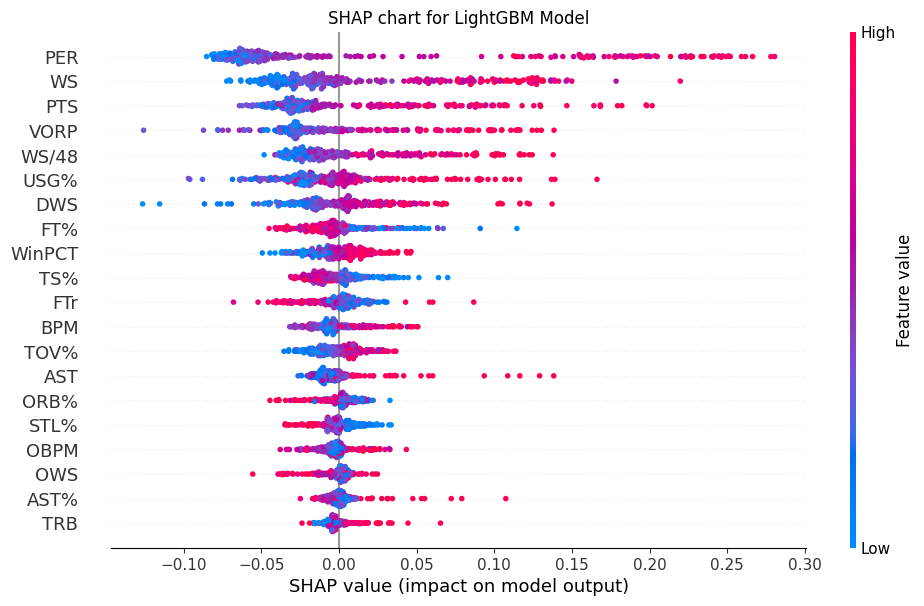

In [126]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(10,6),show=False)
plt.title('SHAP chart for LightGBM Model')
plt.show()

# SVM

In [127]:
# create an SVM model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model using RMSE, R-squared, and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('MAE:', mae)

RMSE: 0.15989370012915388
R-squared: 0.7455094032633169
MAE: 0.11454570140341891


In [128]:
result4 = model.predict(real_test)
output4 = encoded_test
output4['prediction']=result4
output4=output4.sort_values('prediction',ascending=False)
first4 = output4[0:5]
second4 = output4[5:10]
third4 = output4[10:15]

In [129]:
first4

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
521,Nikola Jokić,79,34.6,26.4,12.4,9.0,1.4,0.9,0.583,0.359,...,5.1,9.0,4.2,13.2,10.6,0.695,1,0,0,1.058369
210,Giannis Antetokounmpo,73,35.2,30.4,11.5,6.5,1.2,1.1,0.611,0.274,...,3.7,6.7,2.4,9.0,7.2,0.598,0,1,0,0.984283
573,Luka Dončić,70,37.5,33.9,9.2,9.8,1.4,0.5,0.487,0.382,...,3.5,8.3,1.7,9.9,8.0,0.610,0,0,1,0.943331
461,Shai Gilgeous-Alexander,75,34.0,30.1,5.5,6.2,2.0,0.9,0.535,0.353,...,4.2,6.7,2.3,9.0,7.1,0.695,0,0,1,0.804744
594,Anthony Davis,76,35.5,24.7,12.6,3.5,1.2,2.3,0.556,0.271,...,4.7,3.5,1.7,5.1,4.9,0.573,1,0,0,0.504404


In [130]:
second4

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
369,Jayson Tatum,74,35.7,26.9,8.1,4.9,1.0,0.6,0.471,0.376,...,4.1,4.5,0.6,5.1,4.7,0.780,0,1,0,0.459882
409,Domantas Sabonis,82,35.7,19.4,13.7,8.2,0.9,0.6,0.594,0.379,...,4.0,4.0,2.4,6.5,6.2,0.561,1,0,0,0.458412
36,Jalen Brunson,77,35.4,28.7,3.6,6.7,0.9,0.2,0.479,0.401,...,2.4,6.3,-0.4,5.8,5.4,0.610,0,0,1,0.431439
602,LeBron James,71,35.3,25.7,7.3,8.3,1.3,0.5,0.540,0.410,...,2.8,5.5,0.9,6.5,5.4,0.573,0,1,0,0.430904
550,Tyrese Haliburton,69,32.2,20.1,3.9,10.9,1.2,0.7,0.477,0.364,...,1.5,7.3,-0.4,6.9,5.0,0.573,0,0,1,0.298244


In [131]:
third4

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
135,Anthony Edwards,79,35.1,25.9,5.4,5.1,1.3,0.5,0.461,0.357,...,4.7,2.7,0.5,3.3,3.7,0.683,0,0,1,0.280754
156,Kevin Durant,75,37.2,27.1,6.6,5.0,0.9,1.2,0.523,0.413,...,3.2,4.0,0.1,4.0,4.3,0.598,0,1,0,0.276834
391,Victor Wembanyama,71,29.7,21.4,10.6,3.9,1.2,3.6,0.465,0.325,...,4.4,1.9,3.3,5.2,3.8,0.268,1,0,0,0.268911
155,Devin Booker,68,36.0,27.1,4.5,6.9,0.9,0.4,0.492,0.364,...,2.0,4.0,-1.0,3.0,3.1,0.598,0,0,1,0.252179
208,Zion Williamson,70,31.5,22.9,5.8,5.0,1.1,0.7,0.570,0.333,...,2.8,3.3,0.6,3.8,3.3,0.598,0,1,0,0.207594


# Linear Regression

In [132]:
# create a linear regression model
model = LinearRegression()

# train the model
model.fit(scaled_X_train, y_train)

# make predictions on the test set
y_pred = model.predict(scaled_X_test)

# evaluate the model using RMSE, R-squared, and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('MAE:', mae)

RMSE: 0.17312571141515412
R-squared: 0.7016457857055507
MAE: 0.1370990328979194


In [133]:
result6 = model.predict(real_test)
output6 = encoded_test
output6['prediction']=result6
output6=output6.sort_values('prediction',ascending=False)
first6 = output6[0:5]
second6 = output6[5:10]
third6 = output6[10:15]

In [134]:
first6

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
443,Kawhi Leonard,68,34.3,23.7,6.1,3.6,1.6,0.9,0.525,0.417,...,2.9,4.8,0.6,5.5,4.4,0.622,0,1,0,2.772173
461,Shai Gilgeous-Alexander,75,34.0,30.1,5.5,6.2,2.0,0.9,0.535,0.353,...,4.2,6.7,2.3,9.0,7.1,0.695,0,0,1,2.753510
356,Jaylen Brown,70,33.5,23.0,5.5,3.6,1.2,0.5,0.499,0.354,...,3.2,0.9,-0.1,0.7,1.6,0.780,0,1,0,2.729329
110,Jaren Jackson Jr.,66,32.2,22.5,5.5,2.3,1.2,1.6,0.444,0.320,...,2.8,0.0,0.4,0.4,1.3,0.329,1,0,0,2.620182
156,Kevin Durant,75,37.2,27.1,6.6,5.0,0.9,1.2,0.523,0.413,...,3.2,4.0,0.1,4.0,4.3,0.598,0,1,0,2.608940


In [135]:
second6

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
440,Paul George,74,33.8,22.6,5.2,3.5,1.5,0.5,0.471,0.413,...,2.8,2.9,0.2,3.2,3.3,0.622,0,1,0,2.565787
594,Anthony Davis,76,35.5,24.7,12.6,3.5,1.2,2.3,0.556,0.271,...,4.7,3.5,1.7,5.1,4.9,0.573,1,0,0,2.510942
369,Jayson Tatum,74,35.7,26.9,8.1,4.9,1.0,0.6,0.471,0.376,...,4.1,4.5,0.6,5.1,4.7,0.780,0,1,0,2.448066
449,Norman Powell,76,26.2,13.9,2.6,1.1,0.6,0.3,0.486,0.435,...,1.3,0.4,-1.2,-0.8,0.6,0.622,0,0,1,2.430364
430,Cam Thomas,66,31.4,22.5,3.2,2.9,0.7,0.2,0.442,0.364,...,1.2,0.7,-1.9,-1.2,0.4,0.390,0,0,1,2.340909


In [136]:
third6

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
629,Klay Thompson,77,29.7,17.9,3.3,2.3,0.6,0.5,0.432,0.387,...,1.7,1.1,-1.5,-0.4,0.9,0.561,0,1,0,2.294377
613,Stephen Curry,74,32.7,26.4,4.5,5.1,0.7,0.4,0.450,0.408,...,2.0,6.3,-1.1,5.2,4.4,0.561,0,0,1,2.272645
135,Anthony Edwards,79,35.1,25.9,5.4,5.1,1.3,0.5,0.461,0.357,...,4.7,2.7,0.5,3.3,3.7,0.683,0,0,1,2.265181
567,Myles Turner,77,27.0,17.1,6.9,1.3,0.5,1.9,0.524,0.358,...,2.2,1.0,-0.1,0.9,1.5,0.573,1,0,0,2.180699
398,De'Aaron Fox,74,35.9,26.6,4.6,5.6,2.0,0.4,0.465,0.369,...,3.2,2.6,0.1,2.7,3.2,0.561,0,0,1,2.161669


# Decision Tree

In [137]:
# create a decision tree model
model = DecisionTreeRegressor()

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model using RMSE, R-squared, and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('MAE:', mae)

RMSE: 0.24696660758725641
R-squared: 0.3928646683276683
MAE: 0.1348


In [138]:
result8 = model.predict(real_test)
output8 = encoded_test
output8['prediction']=result8
output8 = output8.sort_values('prediction',ascending=False)

In [139]:
first8 = output8[0:5]
second8 = output8[5:10]
third8 = output8[10:15]

In [140]:
first8

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
602,LeBron James,71,35.3,25.7,7.3,8.3,1.3,0.5,0.540,0.410,...,2.8,5.5,0.9,6.5,5.4,0.573,0,1,0,1.000
573,Luka Dončić,70,37.5,33.9,9.2,9.8,1.4,0.5,0.487,0.382,...,3.5,8.3,1.7,9.9,8.0,0.610,0,0,1,1.000
521,Nikola Jokić,79,34.6,26.4,12.4,9.0,1.4,0.9,0.583,0.359,...,5.1,9.0,4.2,13.2,10.6,0.695,1,0,0,0.996
461,Shai Gilgeous-Alexander,75,34.0,30.1,5.5,6.2,2.0,0.9,0.535,0.353,...,4.2,6.7,2.3,9.0,7.1,0.695,0,0,1,0.992
409,Domantas Sabonis,82,35.7,19.4,13.7,8.2,0.9,0.6,0.594,0.379,...,4.0,4.0,2.4,6.5,6.2,0.561,1,0,0,0.989


In [141]:
second8

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
210,Giannis Antetokounmpo,73,35.2,30.4,11.5,6.5,1.2,1.1,0.611,0.274,...,3.7,6.7,2.4,9.0,7.2,0.598,0,1,0,0.988
391,Victor Wembanyama,71,29.7,21.4,10.6,3.9,1.2,3.6,0.465,0.325,...,4.4,1.9,3.3,5.2,3.8,0.268,1,0,0,0.588
594,Anthony Davis,76,35.5,24.7,12.6,3.5,1.2,2.3,0.556,0.271,...,4.7,3.5,1.7,5.1,4.9,0.573,1,0,0,0.418
137,Rudy Gobert,76,34.1,14.0,12.9,1.3,0.7,2.1,0.661,0.000,...,5.8,0.1,1.7,1.8,2.5,0.683,1,0,0,0.411
520,Reggie Jackson,82,22.2,10.2,1.9,3.8,0.5,0.2,0.431,0.359,...,1.5,-1.8,-1.5,-3.2,-0.6,0.695,0,0,1,0.336


In [142]:
third8

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
376,Malaki Branham,75,21.3,9.2,2.0,2.1,0.4,0.1,0.432,0.347,...,0.6,-3.4,-2.2,-5.6,-1.5,0.268,0,0,1,0.336
369,Jayson Tatum,74,35.7,26.9,8.1,4.9,1.0,0.6,0.471,0.376,...,4.1,4.5,0.6,5.1,4.7,0.780,0,1,0,0.259
500,DeMar DeRozan,79,37.8,24.0,4.3,5.3,1.1,0.6,0.480,0.333,...,2.2,2.1,-0.3,1.8,2.8,0.476,0,1,0,0.243
172,Jarrett Allen,77,31.7,16.5,10.5,2.7,0.7,1.1,0.634,0.000,...,3.9,2.1,0.9,3.0,3.1,0.585,1,0,0,0.191
545,Fred VanVleet,73,36.8,17.4,3.8,8.1,1.4,0.8,0.416,0.387,...,3.1,2.6,0.8,3.4,3.6,0.500,0,0,1,0.184


# AdaBoost

In [143]:
# create an AdaBoost model
model = AdaBoostRegressor(n_estimators=250, learning_rate=0.1)

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model using RMSE, R-squared, and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('MAE:', mae)

RMSE: 0.1969928836564367
R-squared: 0.6137129847999911
MAE: 0.17199561705900623


In [144]:
result5 = model.predict(real_test)
output5 = encoded_test
output5['prediction']=result5
output5 = output5.sort_values('prediction',ascending=False)
first5 = output5[0:5]
second5= output5[5:10]
third5 = output5[10:15]

In [145]:
first5

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
210,Giannis Antetokounmpo,73,35.2,30.4,11.5,6.5,1.2,1.1,0.611,0.274,...,3.7,6.7,2.4,9.0,7.2,0.598,0,1,0,0.825524
573,Luka Dončić,70,37.5,33.9,9.2,9.8,1.4,0.5,0.487,0.382,...,3.5,8.3,1.7,9.9,8.0,0.610,0,0,1,0.813283
461,Shai Gilgeous-Alexander,75,34.0,30.1,5.5,6.2,2.0,0.9,0.535,0.353,...,4.2,6.7,2.3,9.0,7.1,0.695,0,0,1,0.813145
521,Nikola Jokić,79,34.6,26.4,12.4,9.0,1.4,0.9,0.583,0.359,...,5.1,9.0,4.2,13.2,10.6,0.695,1,0,0,0.760632
409,Domantas Sabonis,82,35.7,19.4,13.7,8.2,0.9,0.6,0.594,0.379,...,4.0,4.0,2.4,6.5,6.2,0.561,1,0,0,0.528515


In [146]:
second5

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
550,Tyrese Haliburton,69,32.2,20.1,3.9,10.9,1.2,0.7,0.477,0.364,...,1.5,7.3,-0.4,6.9,5.0,0.573,0,0,1,0.456667
36,Jalen Brunson,77,35.4,28.7,3.6,6.7,0.9,0.2,0.479,0.401,...,2.4,6.3,-0.4,5.8,5.4,0.610,0,0,1,0.450915
594,Anthony Davis,76,35.5,24.7,12.6,3.5,1.2,2.3,0.556,0.271,...,4.7,3.5,1.7,5.1,4.9,0.573,1,0,0,0.431880
369,Jayson Tatum,74,35.7,26.9,8.1,4.9,1.0,0.6,0.471,0.376,...,4.1,4.5,0.6,5.1,4.7,0.780,0,1,0,0.413801
602,LeBron James,71,35.3,25.7,7.3,8.3,1.3,0.5,0.540,0.410,...,2.8,5.5,0.9,6.5,5.4,0.573,0,1,0,0.393613


In [147]:
third5

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,...,DWS,OBPM,DBPM,BPM,VORP,WinPCT,Pos_C,Pos_F,Pos_G,prediction
391,Victor Wembanyama,71,29.7,21.4,10.6,3.9,1.2,3.6,0.465,0.325,...,4.4,1.9,3.3,5.2,3.8,0.268,1,0,0,0.363683
443,Kawhi Leonard,68,34.3,23.7,6.1,3.6,1.6,0.9,0.525,0.417,...,2.9,4.8,0.6,5.5,4.4,0.622,0,1,0,0.331713
135,Anthony Edwards,79,35.1,25.9,5.4,5.1,1.3,0.5,0.461,0.357,...,4.7,2.7,0.5,3.3,3.7,0.683,0,0,1,0.327425
155,Devin Booker,68,36.0,27.1,4.5,6.9,0.9,0.4,0.492,0.364,...,2.0,4.0,-1.0,3.0,3.1,0.598,0,0,1,0.308144
156,Kevin Durant,75,37.2,27.1,6.6,5.0,0.9,1.2,0.523,0.413,...,3.2,4.0,0.1,4.0,4.3,0.598,0,1,0,0.296322
